# Principal Component Regression on Wine Quality
Author: Kenneth Leung

### Import data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Preparation

In [3]:
target = 'quality'
X = df.drop(target,axis=1)
y = df[target]

#### Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(1279, 11)

In [6]:
# Run standardization on X variables
X_train_scaled, X_test_scaled = scale(X_train), scale(X_test)
X_train_scaled

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

___
## Default Linear Regression Methods

In [7]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

### (1) Linear Regression (no regularization)

#### Train set cross-validation

In [8]:
lin_reg = LinearRegression().fit(X_train_scaled, y_train)

In [9]:
lr_scores = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, 
                                 cv=cv, scoring='neg_root_mean_squared_error')
lr_scores

array([0.62488284, 0.66429979, 0.66716067, 0.6295327 , 0.66799473,
       0.69598139, 0.68086448, 0.63361346, 0.72020402, 0.61559878])

In [10]:
lr_score_train = np.mean(lr_scores)
lr_score_train

0.6600132879171828

#### Predict

In [11]:
y_predicted = lin_reg.predict(X_test_scaled)
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lr_score_test

0.6251306211067054

___
## (2) Lasso Regression (L1 regularization)

#### Train set cross-validation

In [12]:
lasso_reg = LassoCV().fit(X_train_scaled, y_train)

In [13]:
lasso_scores = -1 * cross_val_score(lasso_reg, X_train_scaled, y_train, 
                              cv=cv, scoring='neg_root_mean_squared_error')
lasso_scores

array([0.62870156, 0.66402032, 0.66782287, 0.62423568, 0.665409  ,
       0.69646847, 0.67901585, 0.63136541, 0.72231439, 0.612298  ])

In [14]:
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

0.6591651547142681

#### Predict

In [15]:
y_predicted = lasso_reg.predict(X_test_scaled)
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

0.6270782498171976

___
### (3) Ridge Regression (L2 regularization)

#### Train set cross-validation

In [16]:
ridge_reg = RidgeCV().fit(X_train_scaled, y_train)

In [17]:
ridge_scores = -1 * cross_val_score(ridge_reg, X_train_scaled, y_train, 
                                    cv=cv, scoring='neg_root_mean_squared_error')
ridge_scores

array([0.62526896, 0.66348007, 0.66731685, 0.62836003, 0.66768925,
       0.69504426, 0.68018788, 0.63400813, 0.72055488, 0.61482855])

In [18]:
ridge_score_train = np.mean(ridge_scores)
ridge_score_train

0.6596738864224264

#### Predict

In [19]:
y_predicted = ridge_reg.predict(X_test_scaled)
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)
ridge_score_test

0.6252454963271562

___
### Principal Components Regression

#### Evaluate for different number of principal components

In [20]:
lin_reg = LinearRegression()
rmse_list = []

In [21]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(1279, 11)

In [22]:
# View explained variance ratio for each principal component
pca.explained_variance_ratio_

array([0.2801769 , 0.17563995, 0.13957636, 0.11081822, 0.09021248,
       0.05908698, 0.05266627, 0.03883888, 0.03129468, 0.01600997,
       0.0056793 ])

In [36]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,10
0,0.486819,-0.109289,-0.151640,-0.211996,-0.116956,0.151683,-0.334642,-0.176844,-0.205265,-0.236659,0.636428
1,-0.230695,0.293355,-0.442608,0.128183,0.204407,0.476617,-0.468471,-0.081351,0.129516,0.369572,-0.001684
2,0.467369,-0.157400,0.220984,-0.097646,-0.055669,0.067697,0.140384,-0.383500,0.348557,0.629722,-0.076931
3,0.152336,0.239182,0.049249,-0.406056,0.722412,0.040310,0.280960,0.324788,0.014840,0.076839,0.195514
4,0.216295,0.149466,-0.021770,0.663833,0.286446,0.234620,0.391538,-0.352225,-0.128421,-0.236930,0.051357


In [23]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, X_train_pc[:,:i], # Use first i principal components
                                      y_train, cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

In [24]:
rmse_list

[0.8031625853284308,
 0.7343312058799237,
 0.6742899891697901,
 0.6709500084239395,
 0.6676164617485616,
 0.6682324071161514,
 0.663885486700465,
 0.6635084510224303,
 0.6590578212521202,
 0.6588098396621653,
 0.6600132879171828]

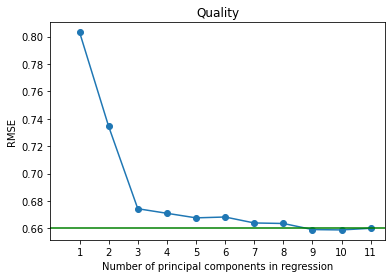

In [25]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
# plt.ylim(ymin=0.7, ymax=0.86);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [26]:
# Visually determine optimal number of principal components
best_pc_num = 7

In [27]:
pcr_score_train = -1 * cross_val_score(lin_reg, X_train_pc[:,:best_pc_num], y_train, 
                                 cv=cv, scoring='neg_root_mean_squared_error').mean()
pcr_score_train

0.663885486700465

#### Predict

In [28]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [29]:
# Get principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape

(320, 7)

In [30]:
# Prediction with test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test

0.635331233810316

___
### Evaluation

In [31]:
train_metrics = np.array([round(lr_score_train,3), round(lasso_score_train,3), round(ridge_score_train,3), round(pcr_score_train,3)]) 
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression', 'Lasso Regression', 
                 'Ridge Regression', f'PCR ({best_pc_num} components)']
train_metrics

,RMSE (Train Set)
Linear Regression,0.660
Lasso Regression,0.659
Ridge Regression,0.660
PCR (7 components),0.664


In [32]:
test_metrics = np.array([round(lr_score_test,3), round(lasso_score_test,3), round(ridge_score_test,3), round(pcr_score_test,3)]) 
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression', 'Lasso Regression', 
                      'Ridge Regression', f'PCR ({best_pc_num} components)']
test_metrics

,RMSE (Test Set)
Linear Regression,0.625
Lasso Regression,0.627
Ridge Regression,0.625
PCR (7 components),0.635


___
#### References

- https://github.com/JWarmenhoven/ISLR-python/blob/9463d8c784b5cc9a271375e901524d4f1cf7378d/Notebooks/Chapter%206.ipynb
- https://archive.ics.uci.edu/ml/datasets/wine+quality
- https://en.wikipedia.org/wiki/Principal_component_regression